In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import random as rand
import numpy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
 


Files already downloaded and verified
Files already downloaded and verified


In [0]:
'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 15000
num_epochs = n_iters / (len(trainset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=trainset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=testset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [34]:
num_epochs

30

In [0]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    """CNN."""
    def __init__(self):
        super(CNN, self).__init__()

        

        # Conv Layer block 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.norm1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        #nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Conv Layer block 2
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.norm2 = nn.BatchNorm2d(128)
        #nn.ReLU(inplace=True)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        #nn.ReLU(inplace=True)
        #nn.MaxPool2d(kernel_size=2, stride=2)
        #nn.Dropout2d(p=0.05)

        # Conv Layer block 3
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.norm3 =nn.BatchNorm2d(256)
        #nn.ReLU(inplace=True)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        #nn.ReLU(inplace=True)
        #nn.MaxPool2d(kernel_size=2, stride=2)
        


        
        self.drop = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(4096, 1024)
        #nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(1024, 512)
        #nn.ReLU(inplace=True)
        #nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(512, 10)
        


    def forward(self, x):
        """Perform forward."""
        
        # conv layer1 
        out = self.conv1(x)
        out = self.norm1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.pool(out)

        #convolution block2
        out = self.conv3(out)
        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv4(out)
        out = self.relu(out)
        out = self.pool(out)
        
        #convolution block3
        out = self.conv5(out)
        out = self.norm3(out)
        out = self.relu(out)
        out = self.conv6(out)
        out = self.relu(out)
        out = self.pool(out)

        # flatten
        out = out.view(out.size(0), -1)
        
        #Linear Function
        out = self.drop(out)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.drop(out)
        out = self.fc3(out)
        
    

        return out

In [0]:
model = CNN()
'''
STEP 4: INSTANTIATE MODEL CLASS
'''

#######################
#  USE GPU FOR MODEL  #
#######################

if torch.cuda.is_available():
    model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [37]:
for epoch in range(num_epochs):
    loss_values = []
    running_loss = 0.0
    for i, (images,labels) in enumerate(train_loader):
        # get the inputs
        #inputs, labels = data

        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)

        # wrap them in Variable
        #inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        if epoch > 16:
            for group in optimizer.param_groups:
                for p in group['params']:
                    state = optimizer.state[p]
                    if state['step'] >= 1024:
                        state['step'] = 1000
        optimizer.step()


        # print statistics
        running_loss += loss.item()

    # Normalizing the loss by the total number of train batches
    running_loss /= len(train_loader)
    loss_values.append(running_loss)
    

    print("Iteration: {0} | Loss: {1} ".format(epoch+1, running_loss))

    
print('==> Finished Training ...')

Iteration: 1 | Loss: 1.4609868088960647 
Iteration: 2 | Loss: 0.988293151974678 
Iteration: 3 | Loss: 0.7905496588945389 
Iteration: 4 | Loss: 0.6633407422304154 
Iteration: 5 | Loss: 0.5667543399930001 
Iteration: 6 | Loss: 0.4919413368701935 
Iteration: 7 | Loss: 0.42495089140534403 
Iteration: 8 | Loss: 0.3661731256842613 
Iteration: 9 | Loss: 0.3137505283951759 
Iteration: 10 | Loss: 0.273065834030509 
Iteration: 11 | Loss: 0.23411874106526376 
Iteration: 12 | Loss: 0.20054009352624416 
Iteration: 13 | Loss: 0.17794297055900096 
Iteration: 14 | Loss: 0.16084255891293286 
Iteration: 15 | Loss: 0.13731075440347196 
Iteration: 16 | Loss: 0.12781605553999542 
Iteration: 17 | Loss: 0.11196734678000211 
Iteration: 18 | Loss: 0.08650543441064656 
Iteration: 19 | Loss: 0.07463961458392442 
Iteration: 20 | Loss: 0.0671950440686196 
Iteration: 21 | Loss: 0.06661647062562406 
Iteration: 22 | Loss: 0.06622552843205631 
Iteration: 23 | Loss: 0.058581727757118646 
Iteration: 24 | Loss: 0.0588053

In [38]:
correct = 0
total = 0
# Iterate through test dataset
for images, labels in test_loader:
    
    if torch.cuda.is_available():
        images = Variable(images.cuda())
    else:
        images = Variable(images)
                
    # Forward pass only to get logits/output
    outputs = model(images)
                
    # Get predictions from the maximum value
    _, predicted = torch.max(outputs.data, 1)
                
    # Total number of labels
    total += labels.size(0)
                
              
    # Total correct predictions
    if torch.cuda.is_available():
        correct += (predicted.cpu() == labels.cpu()).sum()
    else:
        correct += (predicted == labels).sum()
            
accuracy = 100 * correct / total
print("Accuracy on total test data: {}%".format(accuracy.item()))

Accuracy on total test data: 80%


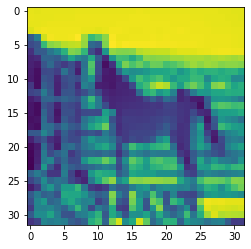

In [58]:
import matplotlib.pyplot as plt

# Plot some images
idx = torch.randint(0, outputs.size(0), ())
img = images[idx,0]

image = img.cpu()
plt.imshow(image.detach().numpy())

In [59]:
idx

tensor(42)

In [60]:
image.size()

torch.Size([32, 32])

In [0]:
# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook



In [62]:
model.conv1.register_forward_hook(get_activation('conv1'))


Text(0.5, 0.98, 'Conv1 Feature Maps')

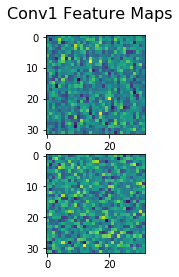

In [63]:
model = CNN()
#model.CNN[0].register_forward_hook(get_activation('conv1'))
model.conv1.register_forward_hook(get_activation('conv1'))
x = torch.randn(1, 3, 32, 32)
output = model(x)
#print(output.shape)


act = activation['conv1'].squeeze()
num_plot = 2
fig, axarr = plt.subplots(min(act.size(0), num_plot))
for idx in range(min(act.size(0), num_plot)):
    axarr[idx].imshow(act[idx])
fig.suptitle('Conv1 Feature Maps', fontsize=16)    

In [64]:
act.size()

torch.Size([32, 32, 32])

In [0]:
model.conv3.register_forward_hook(get_activation('conv3'))
x = torch.randn(1, 3, 32, 32)
#img = img.reshape(1,1,32,32)
output = model(x)
#print(output.shape)




Text(0.5, 0.98, 'Conv3 Feature Maps')

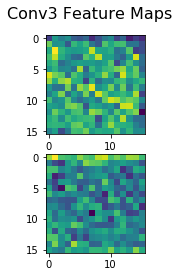

In [66]:
act1 = activation['conv3'].squeeze()
num_plot = 2
fig, axarr = plt.subplots(min(act1.size(0), num_plot))
for idx in range(min(act.size(0), num_plot)):
    axarr[idx].imshow(act1[idx])
fig.suptitle('Conv3 Feature Maps', fontsize=16)    

In [0]:
model.conv4.register_forward_hook(get_activation('conv4'))
x = torch.randn(1, 3, 32, 32)
#img = img.reshape(1,1,32,32)
output = model(x)
#print(output.shape)

Text(0.5, 0.98, 'Conv4 Feature Maps')

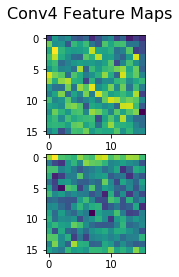

In [70]:
act2 = activation['conv4'].squeeze()
num_plot = 2
fig, axarr = plt.subplots(min(act1.size(0), num_plot))
for idx in range(min(act.size(0), num_plot)):
    axarr[idx].imshow(act1[idx])
fig.suptitle('Conv4 Feature Maps', fontsize=16)    

In [0]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

def vistensor(tensor, ch=0, nrow=20, padding=1): 
    
    n,c,w,h = tensor.shape
    if c != 3:
      tensor = tensor.view(n*c,-1,w,h )
      tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min((tensor.shape[0]//nrow + 1, 64 ) )    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure(figsize=(nrow,rows) )
    plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)))



def plot_img(tensor, num_cols=10):
	num_kernels = tensor.shape[0]
	num_rows = 1+ num_kernels // num_cols
	fig = plt.figure(figsize=(num_cols,num_rows))
	for i in range(num_kernels):
		ax1 = fig.add_subplot(num_rows,num_cols,i+1)
		ax1.imshow(tensor[i], cmap='gray')
		ax1.axis('off')
		ax1.set_xticklabels([])
		ax1.set_yticklabels([])

	plt.subplots_adjust(wspace=0.1, hspace=0.1)
	return plt

first Kernel
torch.Size([32, 3, 3, 3])


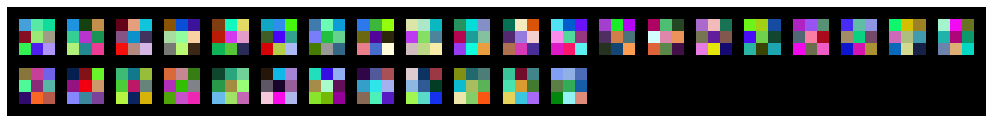

Second Kernel
torch.Size([64, 32, 3, 3])


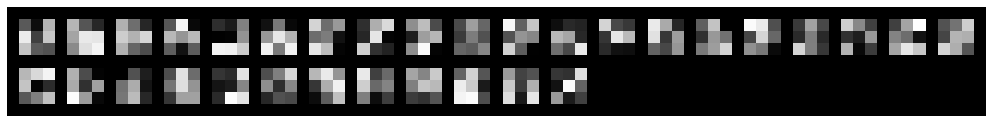

Third Kernel
torch.Size([128, 64, 3, 3])


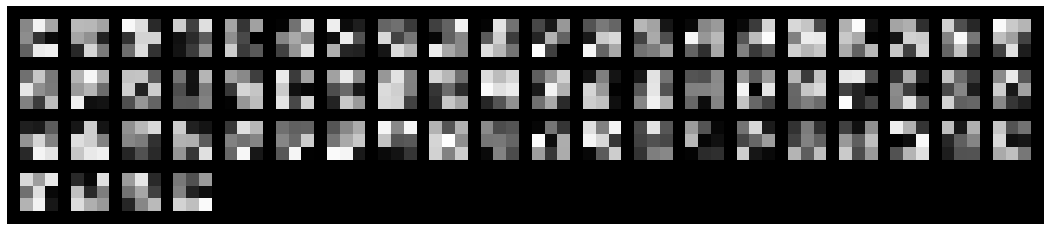

In [32]:
# Visualize Kernels

optim = 'adam'
lr = 0.0001
drop_p = 0.5
filters = model.modules()
model_layers = [i for i in model.children()]
first_layer = model_layers[0]
second_layer = model_layers[3]
third_layer = model_layers[5]

first_kernels = first_layer.weight.data.clone()
print("first Kernel")
print(first_kernels.shape)
vistensor(first_kernels)
plt.axis('off')
plt.ioff()
plt.show()


second_kernels = second_layer.weight.data.clone()
print("Second Kernel")
print(second_kernels.shape)
vistensor(second_kernels[0, ...].reshape(1,32,3,3))
plt.axis('off')
plt.ioff()
plt.show()

third_kernels = third_layer.weight.data.clone()
print("Third Kernel")
print(third_kernels.shape)
vistensor(third_kernels[0, ...].reshape(1,64,3,3))
plt.axis('off')
plt.ioff()
plt.show()



In [0]:
model_layers[5]

Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

Q)Which one is working better in CIFAR-10, MaxPooling or AvgPooling?

Average Pooling works better.

Q) Write the relation between ConvLayer and FC:


The only difference between FC and CONV layers is that the neurons in the CONV layer are connected only to a local region in the input, and that many of the neurons in a CONV volume share parameters. However, the neurons in both layers still compute dot products, so their functional form is identical.